In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



In [3]:
df=pd.read_csv("Housing.csv")
print(df.columns)
print(df.describe)
print(df.info)
print(df.shape)
print(df.head(5))
print(df.dtypes)
df.columns = df.columns.str.strip()



Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620   

Mean Squared Error: 2474575805922.1694
R^2 Score: 0.5104280511870734


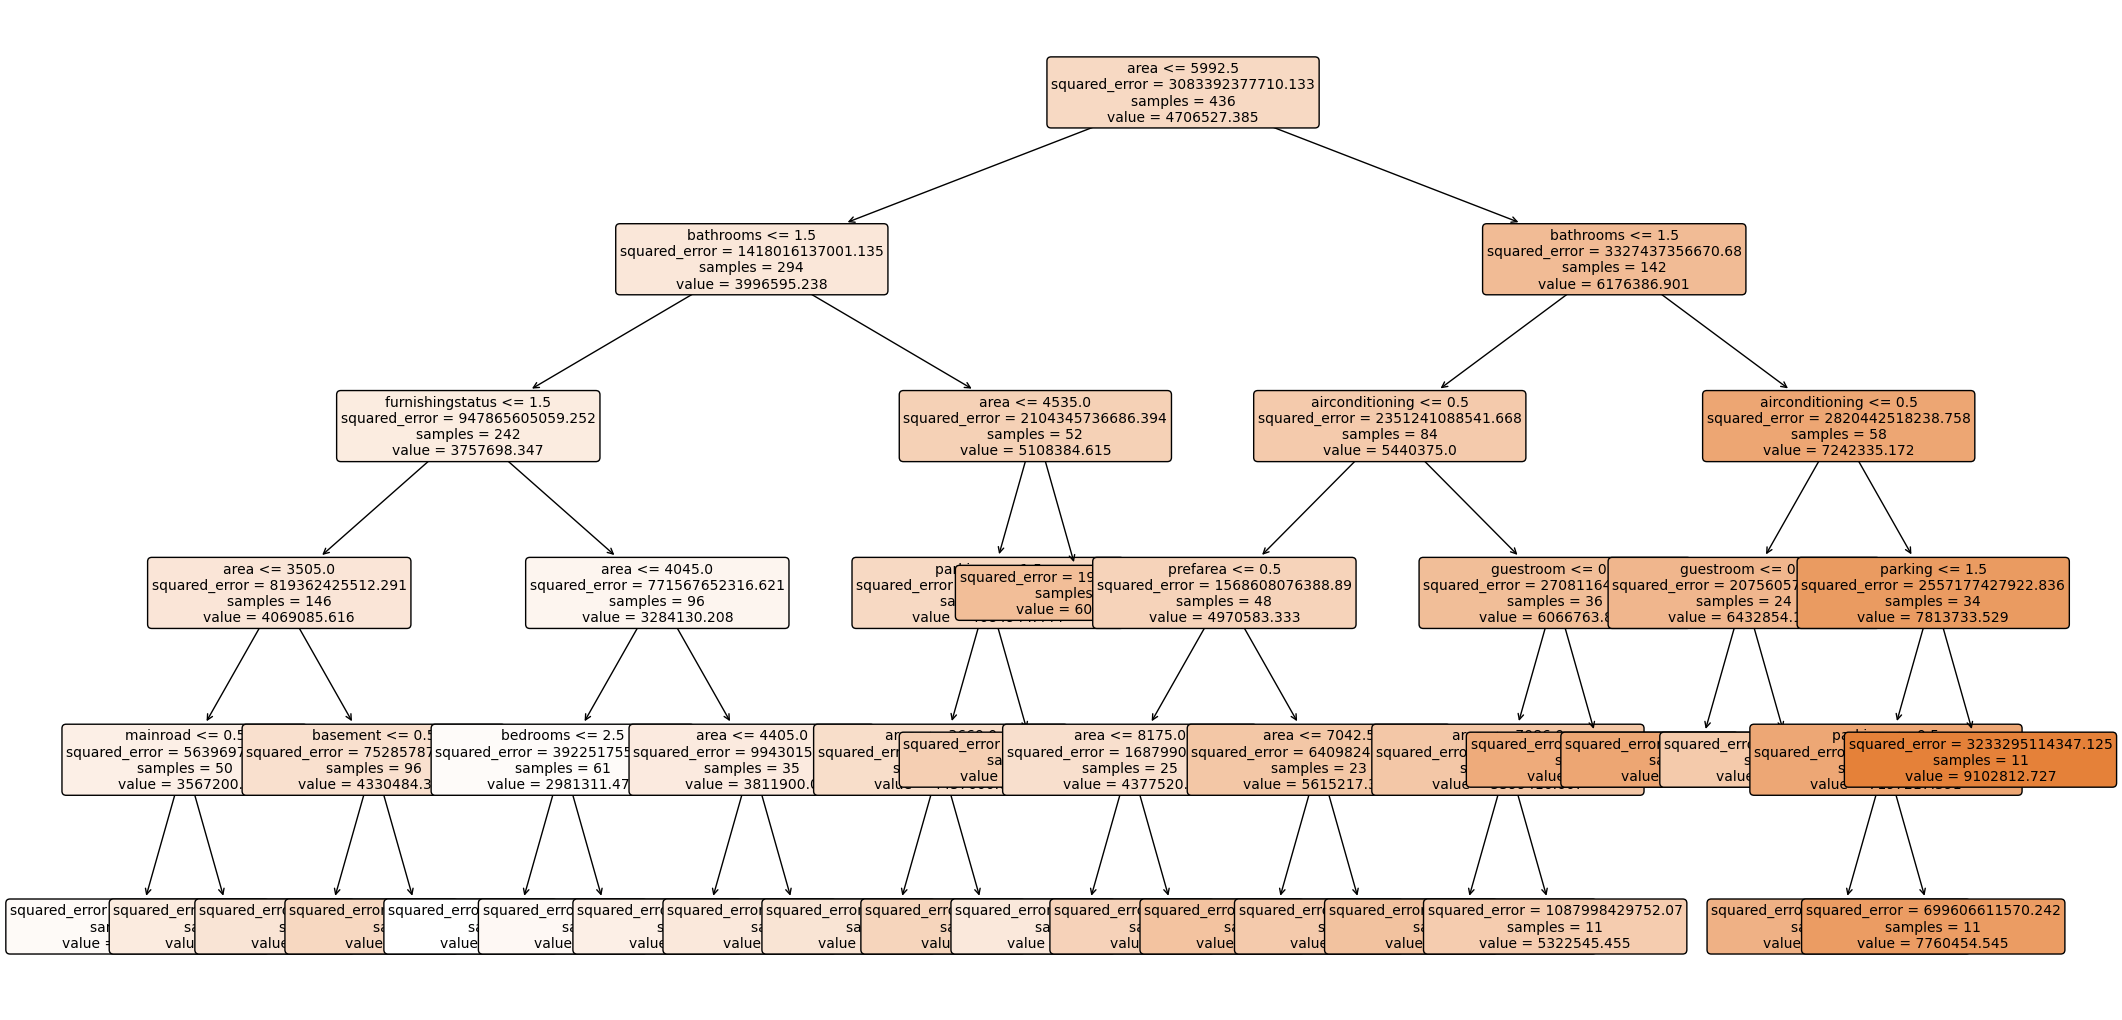

In [8]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
le=LabelEncoder()

for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

x=df.drop(columns=["price"],axis=1)
y=df["price"] 

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

model=DecisionTreeRegressor(max_depth=5,min_samples_leaf=10,random_state=42)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(25,13))
plot_tree(model,feature_names=x.columns,filled=True, rounded=True,
          fontsize=10)
plt.show()

In [9]:
parms={'max_depth':[10,15,30,5],'min_samples_leaf':[5,10,15,1]}
grid=GridSearchCV(DecisionTreeRegressor(random_state=42),parms,cv=3)
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10}
0.506954198276197
